<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/PCA/PCAonFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install kaggle

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d zalando-research/fashionmnist

 71% 49.0M/68.8M [00:00<00:00, 100MB/s] 
100% 68.8M/68.8M [00:00<00:00, 128MB/s]


In [8]:
! unzip fashionmnist.zip


Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("fashion-mnist_train.csv")

In [11]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(60000, 785)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [14]:
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

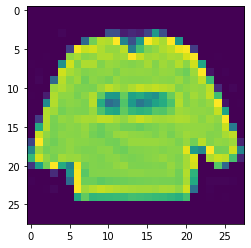

In [15]:
plt.imshow(X[0].reshape(28,28))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8560833333333333

In [21]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Apply pca

from sklearn.decomposition import PCA
pca = PCA(n_components = None)

X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

In [25]:
print(X_train.shape, X_train_new.shape)

(48000, 784) (48000, 784)


In [28]:
var_ratio = pca.explained_variance_ratio_  # this will give an array of 784 items, that is no. of features
# every item in array explains the amount of variance in original dataset.  

# suppose value at first index is 2.22e-01, it means that feature at first index can explain 22.2% variance in our dataset. 

In [ ]:
var_ratio

In [32]:
2.2201e-01  # 22 percent

0.22201

### we will take top 50 features which explains most amount of variance and let's check our accuracy with them.

In [35]:
pca2 = PCA(n_components=50)

X_train_new = pca2.fit_transform(X_train)
X_test_new = pca2.transform(X_test)

In [36]:
print(X_test.shape, X_test_new.shape)

(12000, 784) (12000, 50)


as we can see, we have got new top 50 cols

In [37]:
clf.fit(X_train_new, y_train)

KNeighborsClassifier(n_jobs=-1)

In [39]:
 y_pred_new = clf.predict(X_test_new)

In [40]:
accuracy_score(y_test, y_pred_new)

0.8561666666666666

Question is how many features should we select, what should be the value of n_components in PCA

In [41]:
X_train.shape[1]

784

In [49]:
def best_n():
  accuracy = []

  for i in range(1, (X_train.shape[1] + 1)):
    pca = PCA(n_components=i)
    X_tr = pca.fit_transform(X_train)
    X_te = pca.transform(X_test)

    clf.fit(X_tr, y_train)
    y_pr = clf.predict(X_te)

    accScore =  accuracy_score(y_test, y_pr)
    print(accScore)
    accuracy.append([i, accScore])

  return accuracy

In [50]:
accuracyList = best_n()

0.24366666666666667
0.5085
0.6270833333333333
0.7046666666666667
0.742
0.7649166666666667
0.7804166666666666
0.7853333333333333
0.7938333333333333
0.8044166666666667
0.8135
0.8165
0.8226666666666667
0.8228333333333333
0.8270833333333333
0.8283333333333334
0.82975
0.833
0.8355833333333333
0.8369166666666666


KeyboardInterrupt: ignored

Since it starts taking more time as value increases, I had to stop the execution.